In [1]:
# Алексеев Д.П. (DSU-4, STPY-21)
# Домашнее задание «Визуализация данных» (#2)

# Содержание задания можно также найти здесь:
# https://github.com/obulygin/pyda_homeworks/blob/master/visualization/visualization.ipynb

# Обязательная часть:
# Вам необходимо провести базовый EDA выбранного набора данных.

# Требования к анализу:
# - построить не менее 4 визуализаций различных видов;
# - каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
# - по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

# Откуда брать данные?
# Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком).
# Если идей нет, можете взять один из перечисленных ниже:
# - данные приложений из Google Play;
# - данные о видео из трендов YouTube;
# - данные об уровне счастья в разных странах.

# Дополнительная часть (необязательная):
# - построить дополнительно не менее 2 визуализаций (итого не менее 6);
# - в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json

In [2]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 15,5

In [3]:
# Будем разбирать данные трендов YouTube. Для начала посмотрим информацию по России
df_ru = pd.read_csv('E:\\Netology\\Statistics\\Practice\\Trending YouTube videos\\RUvideos.csv')
df_ru['video_id'] = df_ru['video_id'].astype("string")
df_ru['title'] = df_ru['title'].astype("string")
df_ru['channel_title'] = df_ru['channel_title'].astype("string")
df_ru['tags'] = df_ru['tags'].astype("string")
df_ru['description'] = df_ru['description'].astype("string")

In [4]:
df_ru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40739 entries, 0 to 40738
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40739 non-null  string
 1   trending_date           40739 non-null  object
 2   title                   40739 non-null  string
 3   channel_title           40739 non-null  string
 4   category_id             40739 non-null  int64 
 5   publish_time            40739 non-null  object
 6   tags                    40739 non-null  string
 7   views                   40739 non-null  int64 
 8   likes                   40739 non-null  int64 
 9   dislikes                40739 non-null  int64 
 10  comment_count           40739 non-null  int64 
 11  thumbnail_link          40739 non-null  object
 12  comments_disabled       40739 non-null  bool  
 13  ratings_disabled        40739 non-null  bool  
 14  video_error_or_removed  40739 non-null  bool  
 15  de

In [5]:
# загрузим из отдельного json описания категорий видео
df_json_ru = pd.read_json('E:\\Netology\\Statistics\\Practice\\Trending YouTube videos\\RU_category_id.json')
df_json_ru.head(5)

,kind,etag,items
0,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
1,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
2,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
3,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
4,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."


In [6]:
df_categories_ru = pd.json_normalize(df_json_ru['items']).drop(labels = ['kind','etag','snippet.channelId','snippet.assignable'], axis=1)

# сначала преобразуем 'id' из типа 'object' в 'int64', иначе не сработает join при объединении датафреймов
df_categories_ru['id'] = pd.to_numeric(df_categories_ru['id'])

# теперь заголовок из типа 'object' в 'string'
df_categories_ru['snippet.title'] = df_categories_ru['snippet.title'].astype("string")

df_categories_ru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             31 non-null     int64 
 1   snippet.title  31 non-null     string
dtypes: int64(1), string(1)
memory usage: 624.0 bytes


In [7]:
df2 = df_ru.join(df_categories_ru.set_index('id'), on='category_id')
df2
# из результирующей таблицы можно сделать вывод, что данные по просмотрам были собраны за период с 14.11.2017 по 14.06.2018

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,snippet.title
0,gDuslQ9avLc,17.14.11,Захар и Полина учатся экономить,Т—Ж БОГАЧ,22,2017-11-13T09:09:31.000Z,"захар и полина|""учимся экономить""|""копить день...",62408,334,190,50,https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg,False,False,False,"Знакомьтесь, это Захар и Полина. Вместе с ними...",People & Blogs
1,AOCJIFEA_jE,17.14.11,Биржа Мемов #29. Большой выпуск,Druzhko Show,22,2017-11-13T17:32:11.000Z,"биржа мемов|""лев шагинян""|""мемы""|""пикчи""|""друж...",330043,43841,2244,2977,https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg,False,False,False,"В 29 выпуске Дружко Шоу Сергей сказал, что Бир...",People & Blogs
2,VAWNQDgwwOM,17.14.11,ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ,Юлик,24,2017-11-13T16:11:31.000Z,"юмор|""комедия""|""влог""|""блог""|""смешно""|""смешное...",424596,49854,714,2944,https://i.ytimg.com/vi/VAWNQDgwwOM/default.jpg,False,False,False,http://kapitany.ru/!Yulik.cap - Факультет #Кап...,Entertainment
3,gknkFwKQfHg,17.14.11,Сочная кесадилья с курицей,Hochland,22,2017-11-13T06:51:10.000Z,"хохланд|""сыр""|""рецепты""|""как приготовить""|""вку...",112851,3566,122,80,https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg,False,False,False,*** как готовить ресторанные блюда дома,People & Blogs
4,3sYvZcwzZr8,17.14.11,КЛИПЫ РОДИТЕЛЕЙ НА ШКОЛЬНЫЙ ВЫПУСКНОЙ,Совергон,24,2017-11-13T16:52:36.000Z,"Совергон|""Sovergon""|""клипы""|""родители""|""школа""...",243469,36216,631,1692,https://i.ytimg.com/vi/3sYvZcwzZr8/default.jpg,False,False,False,❏ КОНКУРС КАПИТАНЫ: http://kapitany.ru/!Soverg...,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40734,OMmR9THjVKM,18.14.06,У меня СДВГ! (Story booth на русском) Русская ...,Pastime Time,22,2018-06-13T13:47:01.000Z,"story booth на русском|""story booth перевод""|""...",129488,5893,164,990,https://i.ytimg.com/vi/OMmR9THjVKM/default.jpg,False,False,False,Котики в Blade and Soul - https://bit.ly/2JoOq...,People & Blogs
40735,tX7p7NtNVDE,18.14.06,Мои Детские Травмы 2 (анимация),CaGArt,23,2018-06-12T09:38:38.000Z,"кагарт|""каги""|""цагарт""|""гагарт""|""какарт""|""милш...",99163,4659,337,692,https://i.ytimg.com/vi/tX7p7NtNVDE/default.jpg,False,False,False,Мои Детские Травмы 2 (анимация) ▶️Ск...,Comedy
40736,KAyj5Xm1C64,18.14.06,[ENG SUB] BTS PROM PARTY 2018 Intro + 2nd Gran...,DaisyxBTS 07,24,2018-06-13T12:51:23.000Z,[none],449611,24808,93,974,https://i.ytimg.com/vi/KAyj5Xm1C64/default.jpg,False,False,False,***I do NOT own anything. Just want to share t...,Entertainment
40737,4PiSLIrsSiY,18.14.06,ОБЗОР ВАННОЙ КОМНАТЫ🛁/ТУАЛЕТНОЙ КОМНАТЫ🚽 + ДЕК...,Ксюша Лебедева,22,2018-06-13T00:23:33.000Z,"рум тур ванной комнаты|""room tour bathroom""|""д...",14225,793,39,209,https://i.ytimg.com/vi/4PiSLIrsSiY/default.jpg,False,False,False,"Обзор ванной комнаты, туалетной комнаты+ декор...",People & Blogs


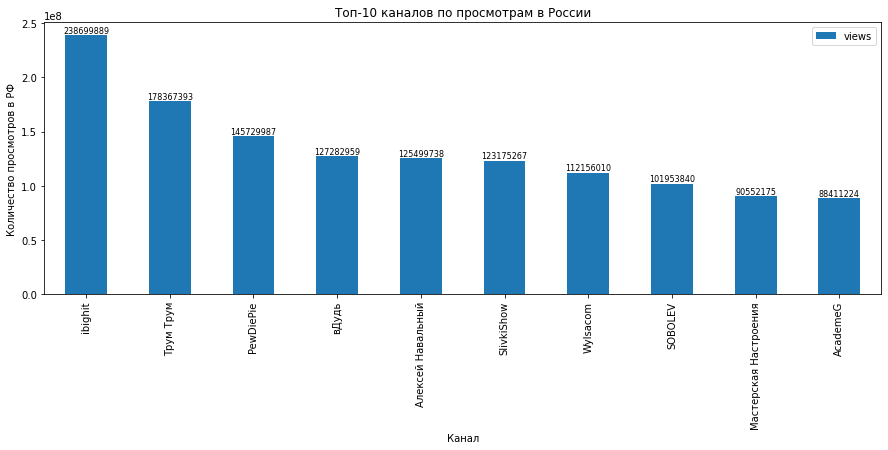

In [8]:
# выведем Топ-10 каналов по просмотрам в России
top10_canals_ru = df_ru[['channel_title', 'views']].groupby('channel_title').sum().sort_values('views', ascending=False).head(10)
top10_canals_ru.plot(kind='bar', title='Топ-10 каналов по просмотрам в России',
                             xlabel='Канал',
                             ylabel='Количество просмотров в РФ')
for i, val in enumerate(top10_canals_ru.values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':8})

# самым популярным каналом в РФ за указанный период оказался канал ibighit южно-корейской K-POP группы BTS.
# Удивительно, что на третьем месте в РФ оказался канал PewDiePie. 
# Остальные топовые места - за русскоязычными каналами.

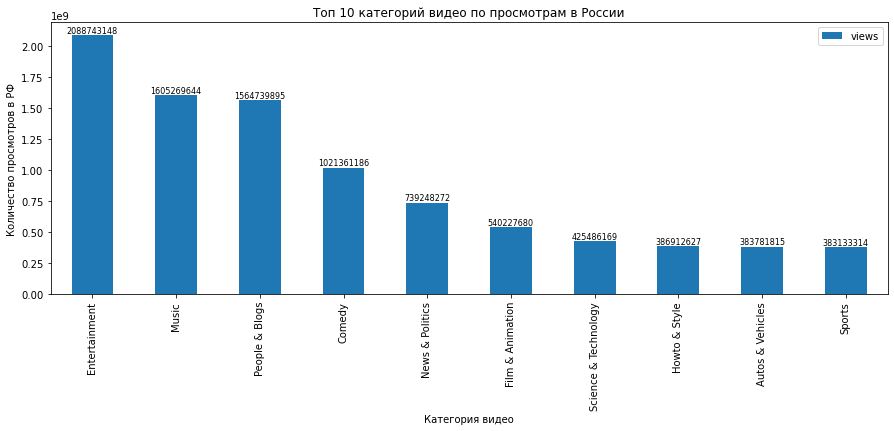

In [9]:
# Топ-10 категорий видео по просмотрам в России
df2.set_index('snippet.title')
top10_categories_ru = df2[['snippet.title', 'views']].groupby('snippet.title').sum().sort_values('views', ascending=False).head(10)
top10_categories_ru.plot(kind='bar', title='Топ 10 категорий видео по просмотрам в России',
                             xlabel='Категория видео',
                             ylabel='Количество просмотров в РФ')
for i, val in enumerate(top10_categories_ru.values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':8})
    
# Как и следовало ожидать, наибольшей популярностью в РФ пользовались развлекательные и музыкальные видео.

In [10]:
# Для анализа данных по всем странам сформируем сводный датафрейм.
# Создание сводного датафрейма начнем с данных по России
df_tmp = pd.read_csv('E:\\Netology\\Statistics\\Practice\\Trending YouTube videos\\RUvideos.csv')
df_tmp['country'] = 'RU'

df_united = df_tmp.copy()
df_united.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,gDuslQ9avLc,17.14.11,Захар и Полина учатся экономить,Т—Ж БОГАЧ,22,2017-11-13T09:09:31.000Z,"захар и полина|""учимся экономить""|""копить день...",62408,334,190,50,https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg,False,False,False,"Знакомьтесь, это Захар и Полина. Вместе с ними...",RU
1,AOCJIFEA_jE,17.14.11,Биржа Мемов #29. Большой выпуск,Druzhko Show,22,2017-11-13T17:32:11.000Z,"биржа мемов|""лев шагинян""|""мемы""|""пикчи""|""друж...",330043,43841,2244,2977,https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg,False,False,False,"В 29 выпуске Дружко Шоу Сергей сказал, что Бир...",RU
2,VAWNQDgwwOM,17.14.11,ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ,Юлик,24,2017-11-13T16:11:31.000Z,"юмор|""комедия""|""влог""|""блог""|""смешно""|""смешное...",424596,49854,714,2944,https://i.ytimg.com/vi/VAWNQDgwwOM/default.jpg,False,False,False,http://kapitany.ru/!Yulik.cap - Факультет #Кап...,RU
3,gknkFwKQfHg,17.14.11,Сочная кесадилья с курицей,Hochland,22,2017-11-13T06:51:10.000Z,"хохланд|""сыр""|""рецепты""|""как приготовить""|""вку...",112851,3566,122,80,https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg,False,False,False,*** как готовить ресторанные блюда дома,RU
4,3sYvZcwzZr8,17.14.11,КЛИПЫ РОДИТЕЛЕЙ НА ШКОЛЬНЫЙ ВЫПУСКНОЙ,Совергон,24,2017-11-13T16:52:36.000Z,"Совергон|""Sovergon""|""клипы""|""родители""|""школа""...",243469,36216,631,1692,https://i.ytimg.com/vi/3sYvZcwzZr8/default.jpg,False,False,False,❏ КОНКУРС КАПИТАНЫ: http://kapitany.ru/!Soverg...,RU


In [11]:
# последовательно присоединим к объединенному датафрейму данные по другим странам, не забывая менять индекс страны:
# США:
df_tmp = pd.read_csv('E:\\Netology\\Statistics\\Practice\\Trending YouTube videos\\USvideos.csv')
df_tmp['country'] = 'US'
df_united = pd.concat([df_united, df_tmp], ignore_index=True)

# Канада:
df_tmp = pd.read_csv('E:\\Netology\\Statistics\\Practice\\Trending YouTube videos\\CAvideos.csv')
df_tmp['country'] = 'CA'
df_united = pd.concat([df_united, df_tmp], ignore_index=True)

# Германия:
df_tmp = pd.read_csv('E:\\Netology\\Statistics\\Practice\\Trending YouTube videos\\DEvideos.csv')
df_tmp['country'] = 'DE'
df_united = pd.concat([df_united, df_tmp], ignore_index=True)

# Франция:
df_tmp = pd.read_csv('E:\\Netology\\Statistics\\Practice\\Trending YouTube videos\\FRvideos.csv')
df_tmp['country'] = 'FR'
df_united = pd.concat([df_united, df_tmp], ignore_index=True)

# Великобритания:
df_tmp = pd.read_csv('E:\\Netology\\Statistics\\Practice\\Trending YouTube videos\\GBvideos.csv')
df_tmp['country'] = 'GB'
df_united = pd.concat([df_united, df_tmp], ignore_index=True)

# Индия:
df_tmp = pd.read_csv('E:\\Netology\\Statistics\\Practice\\Trending YouTube videos\\INvideos.csv')
df_tmp['country'] = 'IN'
df_united = pd.concat([df_united, df_tmp], ignore_index=True)

# Япония:
df_tmp = pd.read_csv('E:\\Netology\\Statistics\\Practice\\Trending YouTube videos\\JPvideos.csv')
df_tmp['country'] = 'JP'
df_united = pd.concat([df_united, df_tmp], ignore_index=True)

# Южная Корея:
df_tmp = pd.read_csv('E:\\Netology\\Statistics\\Practice\\Trending YouTube videos\\KRvideos.csv')
df_tmp['country'] = 'KR'
df_united = pd.concat([df_united, df_tmp], ignore_index=True)

# Мексика:
df_tmp = pd.read_csv('E:\\Netology\\Statistics\\Practice\\Trending YouTube videos\\MXvideos.csv')
df_tmp['country'] = 'MX'
df_united = pd.concat([df_united, df_tmp], ignore_index=True)

In [12]:
df_united.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375942 entries, 0 to 375941
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                375942 non-null  object
 1   trending_date           375942 non-null  object
 2   title                   375942 non-null  object
 3   channel_title           375942 non-null  object
 4   category_id             375942 non-null  int64 
 5   publish_time            375942 non-null  object
 6   tags                    375942 non-null  object
 7   views                   375942 non-null  int64 
 8   likes                   375942 non-null  int64 
 9   dislikes                375942 non-null  int64 
 10  comment_count           375942 non-null  int64 
 11  thumbnail_link          375942 non-null  object
 12  comments_disabled       375942 non-null  bool  
 13  ratings_disabled        375942 non-null  bool  
 14  video_error_or_removed  375942 non-n

In [13]:
# преобразование типов
df_united['title'] = df_united['title'].astype("string")
df_united['channel_title'] = df_united['channel_title'].astype("string")
df_united['tags'] = df_united['tags'].astype("string")
df_united['description'] = df_united['description'].astype("string")
df_united['country'] = df_united['country'].astype("string")
df_united['trending_date'] = pd.to_datetime(df_united['trending_date'], format='%y.%d.%m')

# удаляем ненужные столбцы
df_united.drop('video_id', inplace=True, axis=1)
df_united.drop('publish_time', inplace=True, axis=1)
df_united.drop('thumbnail_link', inplace=True, axis=1)
df_united.drop('comments_disabled', inplace=True, axis=1)
df_united.drop('ratings_disabled', inplace=True, axis=1)
df_united.drop('video_error_or_removed', inplace=True, axis=1)

In [14]:
df_united.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375942 entries, 0 to 375941
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   trending_date  375942 non-null  datetime64[ns]
 1   title          375942 non-null  string        
 2   channel_title  375942 non-null  string        
 3   category_id    375942 non-null  int64         
 4   tags           375942 non-null  string        
 5   views          375942 non-null  int64         
 6   likes          375942 non-null  int64         
 7   dislikes       375942 non-null  int64         
 8   comment_count  375942 non-null  int64         
 9   description    356464 non-null  string        
 10  country        375942 non-null  string        
dtypes: datetime64[ns](1), int64(5), string(5)
memory usage: 31.6 MB


In [15]:
# загрузим из отдельного json описания категорий видео, например из файла по России 
# (предположим, что описания категорий для всех стран одинаковы)
df_json = pd.read_json('E:\\Netology\\Statistics\\Practice\\Trending YouTube videos\\RU_category_id.json')
df_json.head(5)

,kind,etag,items
0,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
1,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
2,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
3,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
4,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."


In [16]:
df_categories = pd.json_normalize(df_json['items']).drop(labels = ['kind','etag','snippet.channelId','snippet.assignable'], axis=1)

# сначала преобразуем 'id' категории из типа 'object' в 'int64', иначе не сработает join при объединении датафреймов
df_categories['id'] = pd.to_numeric(df_categories['id'])

# теперь заголовок из типа 'object' в 'string'
df_categories['snippet.title'] = df_categories['snippet.title'].astype("string")

df_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             31 non-null     int64 
 1   snippet.title  31 non-null     string
dtypes: int64(1), string(1)
memory usage: 624.0 bytes


In [17]:
# добавим в объединенный датафрейм наименования категорий для удобства анализа и отображения 
df_united = df_united.join(df_categories.set_index('id'), on='category_id')
df_united.reset_index()
df_united.head(5)

,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,description,country,snippet.title
0,2017-11-14,Захар и Полина учатся экономить,Т—Ж БОГАЧ,22,"захар и полина|""учимся экономить""|""копить день...",62408,334,190,50,"Знакомьтесь, это Захар и Полина. Вместе с ними...",RU,People & Blogs
1,2017-11-14,Биржа Мемов #29. Большой выпуск,Druzhko Show,22,"биржа мемов|""лев шагинян""|""мемы""|""пикчи""|""друж...",330043,43841,2244,2977,"В 29 выпуске Дружко Шоу Сергей сказал, что Бир...",RU,People & Blogs
2,2017-11-14,ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ,Юлик,24,"юмор|""комедия""|""влог""|""блог""|""смешно""|""смешное...",424596,49854,714,2944,http://kapitany.ru/!Yulik.cap - Факультет #Кап...,RU,Entertainment
3,2017-11-14,Сочная кесадилья с курицей,Hochland,22,"хохланд|""сыр""|""рецепты""|""как приготовить""|""вку...",112851,3566,122,80,*** как готовить ресторанные блюда дома,RU,People & Blogs
4,2017-11-14,КЛИПЫ РОДИТЕЛЕЙ НА ШКОЛЬНЫЙ ВЫПУСКНОЙ,Совергон,24,"Совергон|""Sovergon""|""клипы""|""родители""|""школа""...",243469,36216,631,1692,❏ КОНКУРС КАПИТАНЫ: http://kapitany.ru/!Soverg...,RU,Entertainment


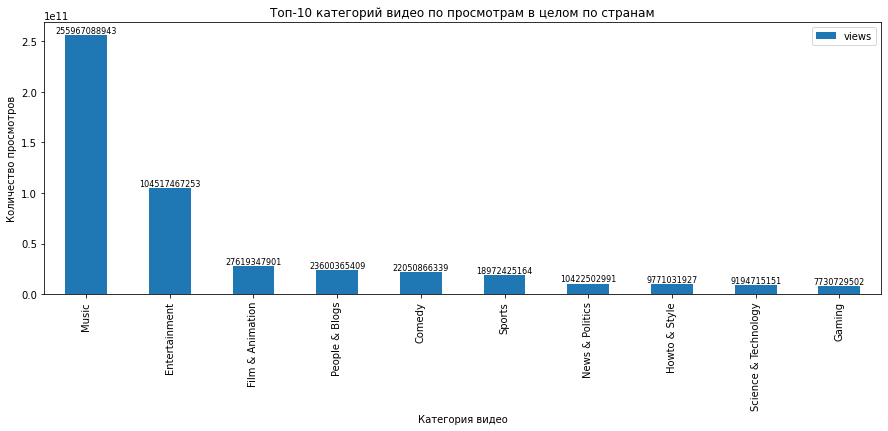

In [18]:
# Столбчатая диаграмма "Топ-10 категорий видео по просмотрам в целом по странам"
top10_categories = df_united[['snippet.title', 'views']].groupby('snippet.title').sum().sort_values('views', ascending=False).head(10)
top10_categories.plot(kind='bar', title='Топ-10 категорий видео по просмотрам в целом по странам',
                             xlabel='Категория видео',
                             ylabel='Количество просмотров')
for i, val in enumerate(top10_categories.values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':8})
    
# Как и по России, общемировые тренды популярности - за музыкальными и развлекательными видео, они лидируют с подавляющим отрывом.

array([<AxesSubplot:ylabel='Количество просмотров'>], dtype=object)

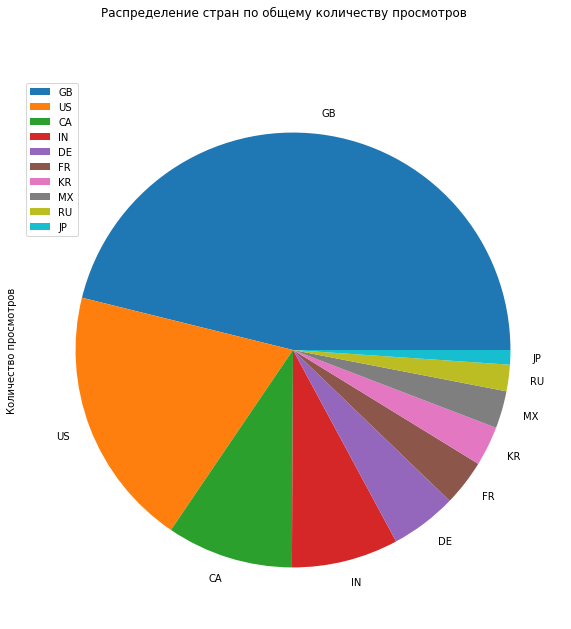

In [19]:
# Круговая диаграмма распределения стран по общему количеству просмотров
df_countries = df_united[['views', 'country']].groupby('country').sum().sort_values('views', ascending=False)
df_countries.plot(kind ='pie', 
                   subplots=True, 
                   title='Распределение стран по общему количеству просмотров',
                    xlabel='Страна(индекс)',
                    ylabel='Количество просмотров',
                    figsize=(10, 10))

# Почти половину просмотров сделали пользователи из Великобритании, четверть - из США. 
# Россия на 9-м месте. Вероятно, это связано не с тем, что в РФ больше заняты делом:))
# а с меньшей глубиной проникновения интернета и меньшей популярностью Youtube

In [20]:
# оценим "активность пользователей" (количество лайков, дизлайков и комментов) по каждой стране и категории видео:
regions = df_united[['views', 'likes', 'dislikes', 'comment_count', 'country', 'snippet.title']].groupby(['country','snippet.title']).sum().sort_values(['country','views'], ascending=False)

# добавим в датафрейм показатели "активности пользователей" (в %%) в расчете на 1 просмотр:
for region in regions.columns:
    regions['likes-to-views'] = round(regions['likes']/regions['views']*100, 2)
    regions['dislikes-to-views'] = round(regions['dislikes']/regions['views']*100, 2)
    regions['comments-to-views'] = round(regions['comment_count']/regions['views']*100, 2)
    
regions.head(30)

views       likes  dislikes  \
country snippet.title                                             
US      Music                 40132892190  1416838584  51179008   
        Entertainment         20604388195   530516491  42987663   
        Film & Animation       7284156721   165997476   6075148   
        Comedy                 5117426208   216346746   7230391   
        People & Blogs         4917191726   186615999  10187901   
        Sports                 4404456673    98621211   5133551   
        Howto & Style          4078545064   162880075   5473899   
        Science & Technology   3487756816    82532638   4548402   
        Gaming                 2141218625    69038284   9184466   
        News & Politics        1473765704    18151033   4180049   
        Education              1180629990    49257772   1351972   
        Pets & Animals          764651989    19370702    527379   
        Autos & Vehicles        520690717     4245656    243010   
        Travel & Events         343557084     4836246    340427   
        Shows                    51501058     1082639     24508   
RU      Entertainment          2088743148    98904908   9479944   
        Music                  1605269644   120129951   8069397   
        People & Blogs         1564739895    73222107  11792144   
        Comedy                 1021361186    69987601   7156751   
        News & Politics         739248272    15274142   9178532   
        Film & Animation        540227680    19150169   1185665   
        Science & Technology    425486169    25866814   1435933   
        Howto & Style           386912627    12708499    632259   
        Autos & Vehicles        383781815    21223727   1473827   
        Sports                  383133314    11466103    706483   
        Gaming                  222864772    12541307    685296   
        Pets & Animals           61642822     2442850    129947   
        Education                41625975     2190395    148439   
        Shows                    32576138      532349     93135   
        Travel & Events          22975521      950559    112546   

                              comment_count  likes-to-views  \
country snippet.title                                         
US      Music                     125296396            3.53   
        Entertainment              73566498            2.57   
        Film & Animation           17887060            2.28   
        Comedy                     22545582            4.23   
        People & Blogs             24778032            3.80   
        Sports                     11192155            2.24   
        Howto & Style              23149550            3.99   
        Science & Technology       11989926            2.37   
        Gaming                     14740713            3.22   
        News & Politics             6039433            1.23   
        Education                   5442242            4.17   
        Pets & Animals              2660705            2.53   
        Autos & Vehicles             784447            0.82   
        Travel & Events              911511            1.41   
        Shows                         95117            2.10   
RU      Entertainment              14324340            4.74   
        Music                      13197717            7.48   
        People & Blogs             11694645            4.68   
        Comedy                      8269629            6.85   
        News & Politics             4724537            2.07   
        Film & Animation            2138455            3.54   
        Science & Technology        5700658            6.08   
        Howto & Style               1613128            3.28   
        Autos & Vehicles            2245794            5.53   
        Sports                      1405578            2.99   
        Gaming                      1623861            5.63   
        Pets & Animals               393434            3.96   
        Education                    276845            5.26   
 

<AxesSubplot:title={'center':'Распределение лайков-к-просмотрам, дизлайков-к-просмотрам и комментов-к-просмотрам'}, ylabel='Frequency'>

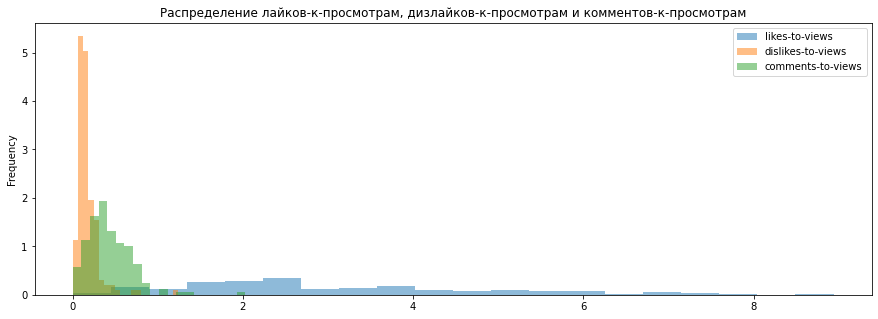

In [21]:
# Построим гистограмму для сравнения распределения лайков-к-просмотрам, дизлайков-к-просмотрам и комментов-к-просмотрам
regions['likes-to-views'].plot(kind='hist', 
                               title='Распределение лайков-к-просмотрам, дизлайков-к-просмотрам и комментов-к-просмотрам',
                               alpha=0.5,
                               bins=20,
                               density=True,
                               legend=True)

regions['dislikes-to-views'].plot(kind='hist', 
                               alpha=0.5,
                               bins=20,
                               density=True,
                                legend=True)

regions['comments-to-views'].plot(kind='hist', 
                               alpha=0.5,
                               bins=20,
                               density=True,
                                legend=True)
# Из гистограммы можно сделать вывод, что чаще всего пользователи (по всем 10-и странам в целом) 
# ставили лайки к видео в 2.0-2,5% просмотренных видео (до этого мне казалось, что чаще).
# Дизлайки ставили ещё реже - лишь в 0,2% просмотренных видео.
#  Комменты оставляли примерно в 0,5% просмотров.

In [22]:
# теперь оценим "активность пользователей" (количество лайков, дизлайков и комментов) в разрезе каналов:
channels = df_united[['views', 'likes', 'dislikes', 'comment_count', 'country', 'snippet.title', 'channel_title']].groupby(['channel_title','country','snippet.title']).sum().sort_values(['views'], ascending=False)

# добавим в датафрейм показатели "активности пользователей" (в %%) в расчете на 1 просмотр видео с конкретного канала:
for channel in channels.columns:
    channels['likes-to-views'] = round(channels['likes']/channels['views']*100, 2)
    channels['dislikes-to-views'] = round(channels['dislikes']/channels['views']*100, 2)
    channels['comments-to-views'] = round(channels['comment_count']/channels['views']*100, 2)
    
channels.head(30)

,,,views,likes,dislikes,comment_count,likes-to-views,dislikes-to-views,comments-to-views
channel_title,country,snippet.title,,,,,,,
NickyJamTV,GB,Music,8516190092,65854585,3771823,2947640,0.77,0.04,0.03
Ozuna,GB,Music,8305198063,71585436,4743926,2985745,0.86,0.06,0.04
Bad Bunny,GB,Music,6891280759,106452827,5256551,6127443,1.54,0.08,0.09
DrakeVEVO,GB,Music,6581834413,148133996,3429228,9225778,2.25,0.05,0.14
ChildishGambinoVEVO,GB,Music,6101309613,148408057,9558340,15441941,2.43,0.16,0.25
Flow La Movie,GB,Music,5151438858,53517444,2801757,2003208,1.04,0.05,0.04
ArianaGrandeVevo,GB,Music,4107436350,97532165,3941157,7869276,2.37,0.10,0.19
Marvel Entertainment,GB,Entertainment,3980221117,100239675,2211077,11525772,2.52,0.06,0.29
ChildishGambinoVEVO,US,Music,3758488765,96700818,6054434,10151289,2.57,0.16,0.27


In [23]:
channels.describe()

,views,likes,dislikes,comment_count,likes-to-views,dislikes-to-views,comments-to-views
count,4.845200e+04,4.845200e+04,4.845200e+04,4.845200e+04,48452.000000,48452.000000,48452.000000
mean,1.026775e+07,2.920161e+05,1.598742e+04,3.245006e+04,3.506871,0.218777,0.581334
std,1.143107e+08,2.901643e+06,2.413529e+05,3.765719e+05,4.141030,0.879393,1.074026
min,1.530000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,3.334575e+04,4.560000e+02,2.700000e+01,7.100000e+01,0.590000,0.050000,0.100000
50%,2.176565e+05,3.432000e+03,2.060000e+02,5.480000e+02,1.800000,0.100000,0.270000
75%,1.464069e+06,2.907875e+04,1.773250e+03,4.229500e+03,5.180000,0.190000,0.670000
max,8.516190e+09,2.831710e+08,2.726963e+07,4.202695e+07,94.290000,51.040000,50.030000


<AxesSubplot:title={'center':'Оценка распределения лайков, дизлайков и комментов пользователей'}>

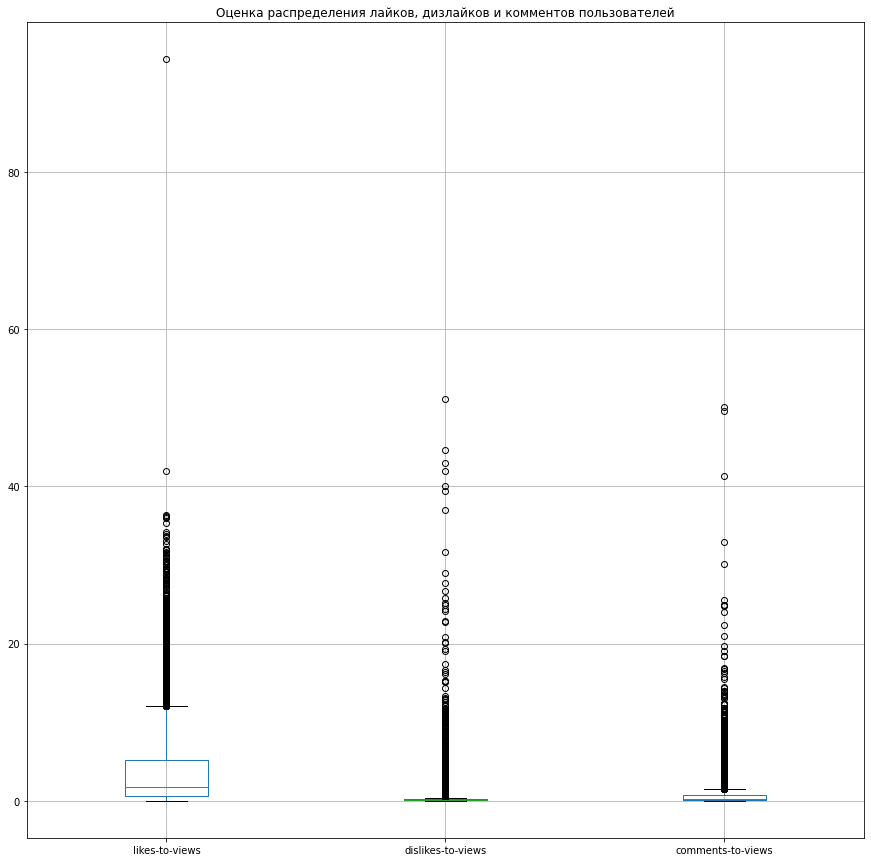

In [25]:
# Боксплот для оценки распределения лайков, дизлайков и комментов пользователей
channels[['likes-to-views', 'dislikes-to-views', 'comments-to-views']].plot(kind='box',
                                        title='Оценка распределения лайков, дизлайков и комментов пользователей', 
                                        grid=True,                                   
                                        figsize=[15,15])

# Анализ боксплота подтверждает ранее сделанные выводы о том, что пользователи гораздо чаще ставят лайки, чем дизлайки,
# но тем не менее делают это достаточно редко. 
# Комментарии к видео оставляют чаще (0,6%), чем ставят дизлайки (0,2%).
# 75% случаев лайков (от всего количества) поставлены лишь примерно в 3-4%% просмотренных видео (в среднем 3,5%).
# Более выраженные выбросы также наблюдаются по лайкам.

# Есть случаи отсутствия лайков, дизлайков и комментариев - очевидно, 
# по причине запрета на данные действия со стороны авторов каналов (например, см. канал Kylie Jenner	GB	People & Blogs).

In [26]:
# оценим выбросы по 'likes-to-views'
ch = channels['likes-to-views']
ch.sort_values(ascending=False).head(10)
# Mausiqi Studios      RU       Entertainment      94.29
# Mausiqi Studios - Этот канал (индийский, между прочим), по всей видимости, "накручивали" лайками пользователи из России.

channel_title        country  snippet.title  
Mausiqi Studios      RU       Entertainment      94.29
Арт видео            RU       Travel & Events    41.94
로이조 TV               KR       Gaming             36.33
Momo Kpop            MX       People & Blogs     36.23
El FedeWolf          MX       People & Blogs     36.05
Alan Rojas           MX       Music              36.01
Agus Goya            MX       Music              35.38
Лисёнок из Аватарии  RU       Gaming             34.21
GnysBoy              RU       Entertainment      33.93
tkj TAKARAJIMASHA    JP       Entertainment      33.72
Name: likes-to-views, dtype: float64

In [27]:
# оценим выбросы по 'dislikes-to-views'
ch2 = channels['dislikes-to-views']
ch2.sort_values(ascending=False).head(20)
# наиболее "щедрые" на дизлайки (не в абсолютном количестве, а в доле к просмотренным видео) - пользователи из России))

channel_title                                   country  snippet.title   
НАРОДНОЕ ПРАВЛЕНИЕ                              RU       People & Blogs      51.04
Все про все!                                    RU       News & Politics     44.64
Обо всЁм                                        RU       Comedy              42.93
Anton Neverov                                   RU       Film & Animation    41.89
Yulia Latynina                                  RU       Music               39.98
Dasha Day                                       RU       People & Blogs      39.45
Голос Америки                                   RU       News & Politics     36.97
TV СИЛА В ПРАВДЕ Регионы России                 RU       News & Politics     31.60
Новокузнецк – город-сад! (город, которого нет)  RU       People & Blogs      29.00
Stanislav Morozov                               RU       People & Blogs      27.74
releips007                                      RU       People & Blogs      26.71
Борис ТыНеПра

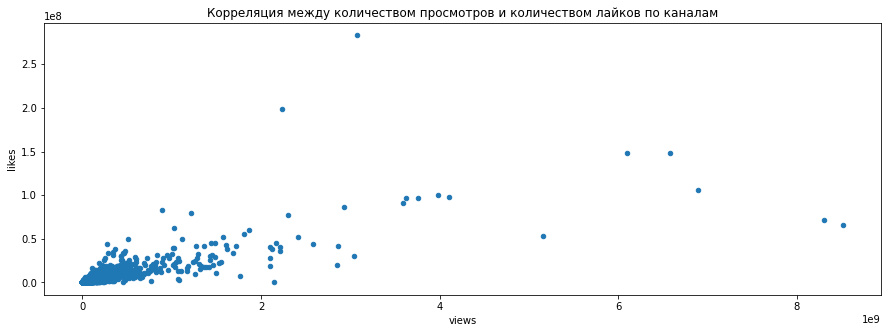

<AxesSubplot:title={'center':'Корреляция между количеством просмотров и количеством дизлайков по каналам'}, xlabel='views', ylabel='dislikes'>

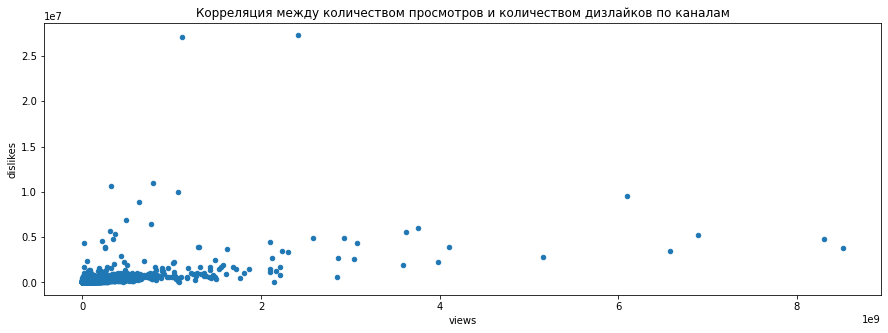

In [28]:
# оценим взаимосвязь просмотров и лайков/дизлайков по каналам
channels.plot(kind='scatter', 
        x='views', 
        y='likes', 
        title='Корреляция между количеством просмотров и количеством лайков по каналам')
plt.show()
channels.plot(kind='scatter', 
        x='views', 
        y='dislikes', 
        title='Корреляция между количеством просмотров и количеством дизлайков по каналам')

# 1) можно сделать вывод, что зависимость по лайкам практически линейная, но есть выраженные выбросы по примерно 10-и каналам.

# 2) по дизлайкам направленность в виде двух "веток": а) в левой части - около 10-12 каналов с относительно небольшим количеством просмотров и 
# большим количеством дизлайков (может быть, целенаправленная тактика со стороны конкурентов/ботов).
# б) вторая ветка по дизлайкам - обычная прямая зависимость, с ростом количества просмотров пропорицонально 
# увеличивается количество дизлайков.

In [29]:
# Выведем динамику просмотров помесячно в разрезе стран.
# Сначала добавим в датафрейм колонку с месяцем и датой:
df_united['month_year'] = df_united['trending_date'].dt.to_period('M')
df_united.head(5)

,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,description,country,snippet.title,month_year
0,2017-11-14,Захар и Полина учатся экономить,Т—Ж БОГАЧ,22,"захар и полина|""учимся экономить""|""копить день...",62408,334,190,50,"Знакомьтесь, это Захар и Полина. Вместе с ними...",RU,People & Blogs,2017-11
1,2017-11-14,Биржа Мемов #29. Большой выпуск,Druzhko Show,22,"биржа мемов|""лев шагинян""|""мемы""|""пикчи""|""друж...",330043,43841,2244,2977,"В 29 выпуске Дружко Шоу Сергей сказал, что Бир...",RU,People & Blogs,2017-11
2,2017-11-14,ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ,Юлик,24,"юмор|""комедия""|""влог""|""блог""|""смешно""|""смешное...",424596,49854,714,2944,http://kapitany.ru/!Yulik.cap - Факультет #Кап...,RU,Entertainment,2017-11
3,2017-11-14,Сочная кесадилья с курицей,Hochland,22,"хохланд|""сыр""|""рецепты""|""как приготовить""|""вку...",112851,3566,122,80,*** как готовить ресторанные блюда дома,RU,People & Blogs,2017-11
4,2017-11-14,КЛИПЫ РОДИТЕЛЕЙ НА ШКОЛЬНЫЙ ВЫПУСКНОЙ,Совергон,24,"Совергон|""Sovergon""|""клипы""|""родители""|""школа""...",243469,36216,631,1692,❏ КОНКУРС КАПИТАНЫ: http://kapitany.ru/!Soverg...,RU,Entertainment,2017-11


In [33]:
dynamics_by_date = df_united[['views', 'month_year']].groupby(['month_year']).sum()
dynamics_by_date

,views
month_year,
2017-11,22589846564
2017-12,48166279065
2018-01,38372952781
2018-02,61941337984
2018-03,91597772492
2018-04,72799543575
2018-05,115335685918
2018-06,47909305156


<AxesSubplot:title={'center':'Динамика просмотров видео помесячно в целом по странам'}, xlabel='Месяц, Год', ylabel='Количество просмотров'>

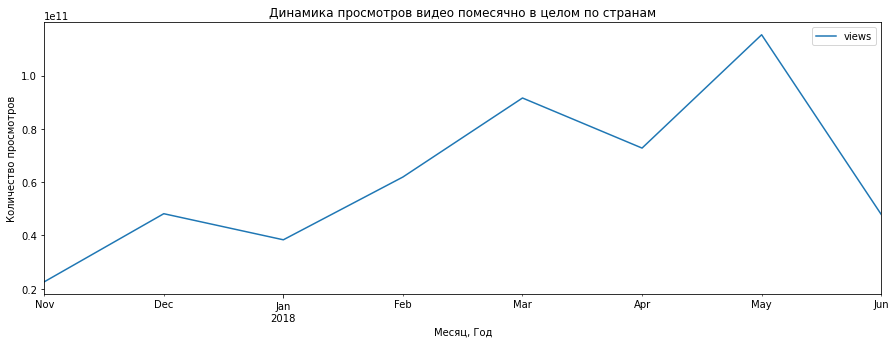

In [35]:
# выведем линейную диаграмму с динамикой просмотров по месяцам
dynamics_by_date.plot(kind='line',
                    title='Динамика просмотров видео помесячно в целом по странам',
                    xlabel='Месяц, Год',
                    ylabel='Количество просмотров')
# Можно сделать вывод, что весной 2018г количество просмотров значительно выросло.
# Хотя изначально ожидал, что больше всего просмотров будет в районе новогодних праздников.

In [36]:
import seaborn as sns

Text(0.5, 1.0, 'Распределение лайков-к-просмотрам, дизлайков-к-просмотрам по странам')

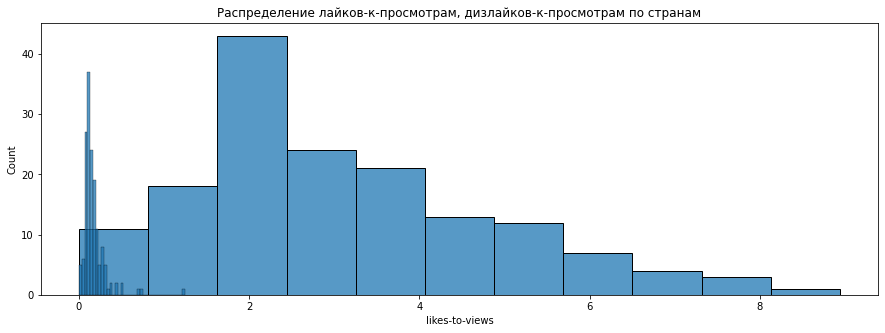

In [37]:
# построим гистограмму распределения лайков-к-просмотрам, дизлайков-к-просмотрам на основании датафрейма по странам
sns.histplot(regions['likes-to-views'])
sns.histplot(regions['dislikes-to-views'])
plt.title('Распределение лайков-к-просмотрам, дизлайков-к-просмотрам по странам')
# выводы были сделаны ранее, в seaborn просто другой дизайн отображения гистограммы.